## Biodiversity Project

**Project steps:**
1) Load and wrangler data
2) Exploratory Data Analysis
3) Final insights

**Goal:**

Through data-driven exploration, I aspire to illuminate the connections between speciesand parks, informing possible in-danger species and different categories.

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 1** - Load and wrangler data

In [8]:
observations = pd.read_csv("observations.csv")
species_info = pd.read_csv("species_info.csv")

In [24]:
#observations first look
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [71]:
#observations data check
print(observations.dtypes)
print(observations.isnull().sum()) # no null data
print("We have " + str(observations.duplicated().sum()) +" duplicated rows" ) 
observations.drop_duplicates()

scientific_name    object
park_name          object
observations        int64
dtype: object
scientific_name    0
park_name          0
observations       0
dtype: int64
We have 15 duplicated rows


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


In [11]:
#species firs look
species_info.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [50]:
#species_info data check
print(species_info.dtypes)
print(species_info.isnull().sum()) # We have null data in "conservation_status" column
print("We have " + str(species_info.duplicated().sum()) +" duplicated rows") 

category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object
category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64
We have 0 duplicated rows


In [72]:
#lets dig in null rows at "conservation_status" column
print("We have a " + str(round(species_info.conservation_status.isnull().sum() / species_info.conservation_status.count())) + 
      "% null values in conservation_status. This null data is MAR with a % less than 60, so we can ommit this values to analize the rest of the species that do have values")

species_info[species_info.conservation_status.isnull()]
species_info.dropna()

We have a 29% null values in conservation_status. This null data is MAR with a % less than 60, so we can ommit this values to analize the rest of the species that do have values


,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern
...,...,...,...,...
5302,Vascular Plant,Callitriche marginata,Winged Water-Starwort,Species of Concern
5399,Vascular Plant,Camissonia sierrae ssp. alticola,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
5426,Vascular Plant,Epilobium oreganum,"Grants Pass Willowherb, Oregon Fireweed",Species of Concern
5436,Vascular Plant,Botrychium ascendens,"Trianglelobe Moonwort, Upswept Moonwort",Species of Concern


**Step 2:** Exploratory Data Analysis

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


C:\Users\Facundo\AppData\Local\Temp\ipykernel_21848\1154020508.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_group_pivot = data_group.pivot("conservation_status", "category", "counts")


Text(0, 0.5, 'Number of Species')

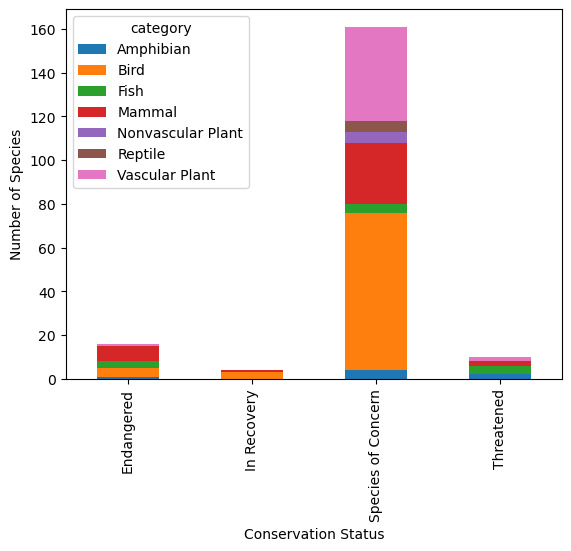

In [124]:
print(species_info.category.unique())

data_group = species_info.groupby(["category", "conservation_status"]).size().reset_index(name="counts")
data_group_pivot = data_group.pivot("conservation_status", "category", "counts")

data_group_pivot.plot(kind="bar", stacked=True)
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")

With this plot we can identify that Mammals are the especies that have more portion in "endangered" status.

In [167]:
print(observations.park_name.unique())

idx = observations.groupby(['park_name'])['observations'].transform(max) == observations['observations']

df1 = observations[idx]
df2 = species_info[['scientific_name', 'common_names','category']]

new_marge = df1.merge(df2,how='outer',left_on=['scientific_name'],right_on=['scientific_name'])

#Which species were spotted the most at each park?
new_marge[['park_name','common_names','observations','category']].dropna()

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


,park_name,common_names,observations,category
0,Yosemite National Park,"Shockley's Ivesia, Sky Mousetail",223.0,Vascular Plant
1,Great Smoky Mountains National Park,Spiny Sowthistle,147.0,Vascular Plant
2,Yellowstone National Park,"Deep-Root Clubmoss, Ground Cedar",321.0,Vascular Plant
3,Bryce National Park,"Beaked Corn-Salad, Corn Salad",176.0,Vascular Plant


In [184]:

df1 = observations
df2 = species_info[['scientific_name', 'common_names','category']]
df1_df2_marge = df1.merge(df2, how='outer', left_on=['scientific_name'], right_on=['scientific_name'])


df1_df2_marge_mammal = df1_df2_marge.loc[df1_df2_marge['category'] == 'Mammal']
print(df1_df2_marge_mammal)
df1_df2_marge_mammal.drop_duplicates()
idx = df1_df2_marge_mammal.groupby(['park_name'])['observations'].transform(max) == df1_df2_marge_mammal['observations']

final_data = df1_df2_marge_mammal[idx]

final_data[['park_name','scientific_name','observations']].drop_duplicates()
#Which species were spotted the most at each park?

          scientific_name                            park_name  observations  \
4          Neovison vison  Great Smoky Mountains National Park            77   
5          Neovison vison            Yellowstone National Park           218   
6          Neovison vison                  Bryce National Park            91   
7          Neovison vison               Yosemite National Park           200   
340    Blarina brevicauda                  Bryce National Park            77   
...                   ...                                  ...           ...   
25227          Ovis aries            Yellowstone National Park           221   
25624           Gulo gulo  Great Smoky Mountains National Park            90   
25625           Gulo gulo                  Bryce National Park           114   
25626           Gulo gulo            Yellowstone National Park           270   
25627           Gulo gulo               Yosemite National Park           157   

                                       

,park_name,scientific_name,observations
3733,Yellowstone National Park,Lasiurus borealis,296
3735,Great Smoky Mountains National Park,Lasiurus borealis,127
20716,Bryce National Park,Martes americana,167
24810,Yosemite National Park,Cervus elaphus,203


**Step 3:** Final insights

As final insight, I learn that mammals are the category of animals that are most "Endangered"

Additionally, the most spotted species in all parks are in the category of "Vascular Plant". In Mammals category "Lasiurus borealis" are the most spotted species